XML Model Development
=========================

In order to perform a maximum likelihood analysis of gamma-ray data, you will need to construct a model containing the components that the fitter will try to match to your data. These components are contained in an XML (Extendable Markup Language) model file, which is one of the input parameters for gtlike.

Ask yourself: "What do I expect to be contributing to the gamma-ray emission I am analyzing?"


You need to include:
----------

* Astrophysical gamma-ray sources
    * AGN
    * Pulsars
    * Supernova Remnants
    * Binaries
    * Active Novae
    * Any pertinent Gamma-ray Bursts
    * The Sun and Moon (if they come near your ROI)
    * Others...?

* Astrophysical backgrounds
    * Galactic diffuse emission
    * Earth limb emission 
    * Unresolved extragalactic sources

* Irreducible backgrounds
    * Isotropic and mainly instrumental

Model Components
=====================

Your XML model file will contain a "source" entry for every component you believe contributes to the gamma-ray flux in your region of interest.

> **NOTE: You can combine sources when their spatial signatures are the same and their combined spectral signatures can be represented by a single spectral model. **

Point sources
-----------------

**Need:** position information and an initial guess for the spectral shape. 

Can generate position information from various catalogs (gamma-ray or otherwise). 

Spectral information available in the LAT catalogs, and in numerous papers.


Source Catalogs
-------------------------
Here's a summary of what is currently available:

* Overall Point Source Catalogs
    * [Bright Source List](http://heasarc.gsfc.nasa.gov/W3Browse/fermi/fermilbsl.htmls) - 205 sources significant above the 10-sigma level in the first 3 months in the 100 MeV -100 GeV band.
    * [First Catalog / 1FGL](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/1yr_catalog/) - 1451 sources significant above TS=25 in the first 11 months in the 100 MeV -100 GeV band.
    * [Second Catalog / 2FGL](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/2yr_catalog/) - 1871 sources significant above TS=25 in the first 24 months in the 100 MeV -100 GeV band.
    * [Third Catalog / 3FGL](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/4yr_catalog/) - 3033 sources significant above TS=25 in the first 48 months in the 100 MeV -300 GeV band.
    * [First High-Energy Catalog / 1FHL](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/1FHL/) - 514 sources detected above 10 GeV, with TS=25 in 3 years of data.
    * [Second High-Energy Catalog / 2FHL](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/2FHL/) - 360 sources detected above 50 GeV, with TS=25 in 80 months of data.
    
* Pulsars
    * [First LAT Pulsar Catalog / 1PC](http://adsabs.harvard.edu/abs/2010ApJS..187..460A) - 46 gamma-ray pulsars with significant pulsations detected in the first 6 months.
    * [Second LAT PUlsar Catalog / 2PC](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/2nd_PSR_catalog/) - 117 gamma-ray pulsars detected using 3.5 years of LAT data.
    * [Up-to-date list of gamma-ray pulsars](https://confluence.slac.stanford.edu/display/GLAMCOG/Public+List+of+LAT-Detected+Gamma-Ray+Pulsars) - The LAT team maintains this list between catalog releases.
    
* Supernova Remnants
    * [First LAT Supernova Remnant Catalog / 1SC](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/1st_SNR_catalog/) - Results of a systematic search for gamma-ray emission from 279 regions containing supernova remnants.

* Active Galactic Nuclei
    * [First Catalog of Fermi AGN / 1LAC](http://adsabs.harvard.edu/abs/2010ApJ...715..429A) - AGN associations that correspond to sources in the 1FGL catalog.
    * [Second Catalog of LAT AGN / 2LAC](http://heasarc.gsfc.nasa.gov/W3Browse/fermi/fermilac.html) - AGN associations that correspond to sources in the 2FGL catalog.
    * [Third Catalog of LAT AGN / 3LAC](http://arxiv.org/abs/1501.06054) - AGN associations that correspond to sources in the 3FGL catalog.
    
* Gamma-ray Bursts
    * [First Catalog of LAT GRBs](http://heasarc.gsfc.nasa.gov/W3Browse/fermi/fermilgrb.html) - LAT-detected GRB from the first 3 years of operation.
    * [Second GBM Burst Catalog](http://heasarc.gsfc.nasa.gov/W3Browse/fermi/fermigbrst.html) - GRBs detected by the GBM in the first four years of the mission.

You can access most of these from the [FSSC Website](http://fermi.gsfc.nasa.gov/ssc/)&rarr;[Data](http://fermi.gsfc.nasa.gov/ssc/data/)&rarr;[Data Access](http://fermi.gsfc.nasa.gov/ssc/data/access/)

In [8]:
from IPython.display import Image,HTML

In [2]:
HTML("<iframe src='http://fermi.gsfc.nasa.gov/ssc/data/access/' width='850' height='500'></iframe>")

"My source isn't in the catalog!"
--------------

**No Problem:** Use a model from another source of the same source class. (E.g. Use a blazar-like spectrum if looking for a blazar, and select typical values for the spectral parameters.)

**BUT**

It's usually better to start with a very simple model (power-law) just to see if a source is there.

If your ROI contains a moving point source (sun/moon), you will need to include a spatial template for that component.

Extended or Diffuse sources
-----------------

**Need:** spatial template, and an initial guess for the spectral shape. 

Templates are available from the LAT team for extended sources in the LAT catalog. Can also generate templates by using image contours from other wavebands, or use simple spatial models like a disk, ring, or gaussian.

All-sky diffuse sources also require templates and spectral information (either a model, or a counts cube). The most common of these is the Insterstellar Emission Model (aka. Galactic diffuse model), which is an all-sky spatial cube (spectral information is folded into the spatial map). 

Galactic Diffuse Model
---------

In [4]:
import pyfits
gal_diffmodel = pyfits.open('gll_iem_v06.fits')
gal_diffmodel.info()

Filename: gll_iem_v06.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      36   (2880, 1441, 30)   float32   
1    ENERGIES    BinTableHDU     11   30R x 1C     [D]   


In [5]:
energies = gal_diffmodel[1].data
print energies

[(  5.84731331e+01,) (  7.99703598e+01,) (  1.09370895e+02,)
 (  1.49580322e+02,) (  2.04572464e+02,) (  2.79782074e+02,)
 (  3.82641968e+02,) (  5.23317566e+02,) (  7.15711548e+02,)
 (  9.78837830e+02,) (  1.33870056e+03,) (  1.83086426e+03,)
 (  2.50396851e+03,) (  3.42453467e+03,) (  4.68354053e+03,)
 (  6.40541064e+03,) (  8.76031445e+03,) (  1.19809814e+04,)
 (  1.63857031e+04,) (  2.24097910e+04,) (  3.06485918e+04,)
 (  4.19163281e+04,) (  5.73265664e+04,) (  7.84022734e+04,)
 (  1.07226312e+05,) (  1.46647297e+05,) (  2.00561125e+05,)
 (  2.74296000e+05,) (  3.75138969e+05,) (  5.13056156e+05,)]


In [9]:
%pylab inline
import time
from IPython.display import Image,display,clear_output
import matplotlib.pyplot as plt
from matplotlib import transforms
from matplotlib import rc
import numpy as np
from astropy.io import fits as pyfits

Populating the interactive namespace from numpy and matplotlib


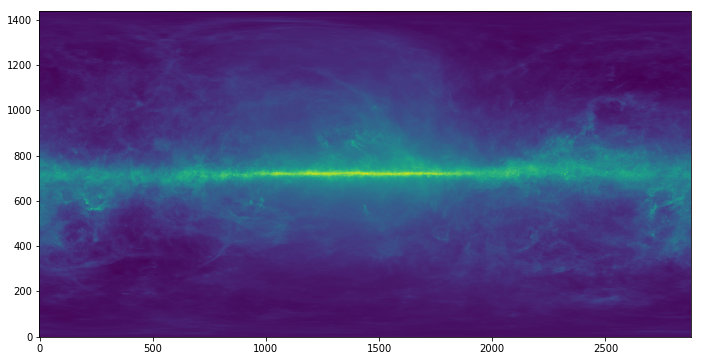

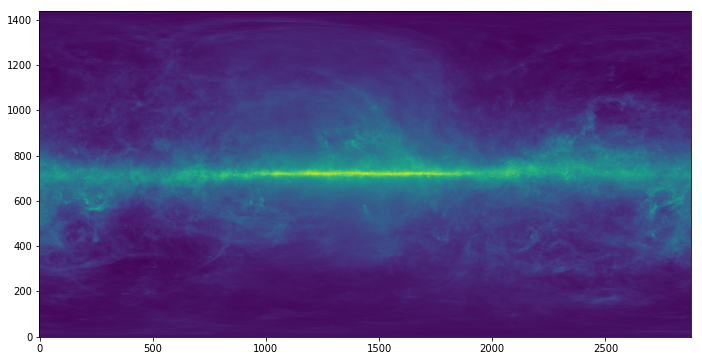

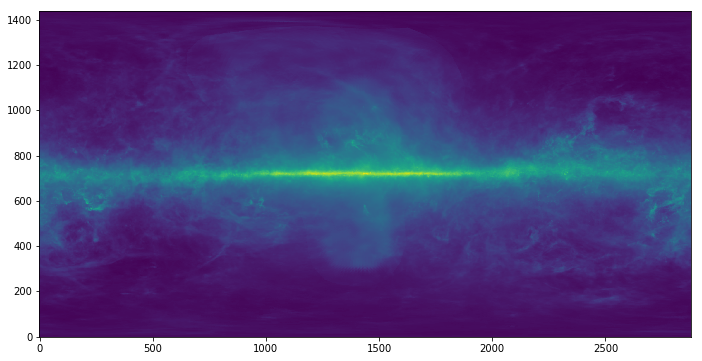

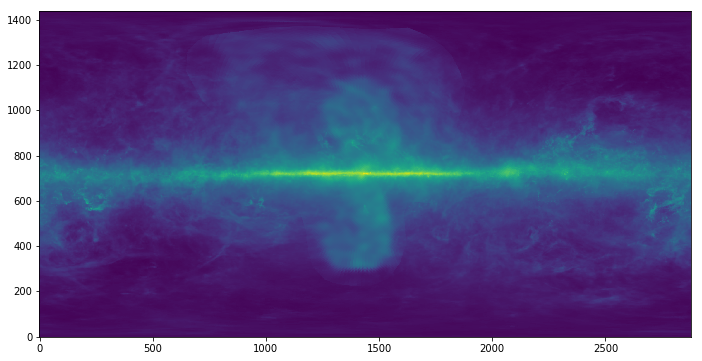

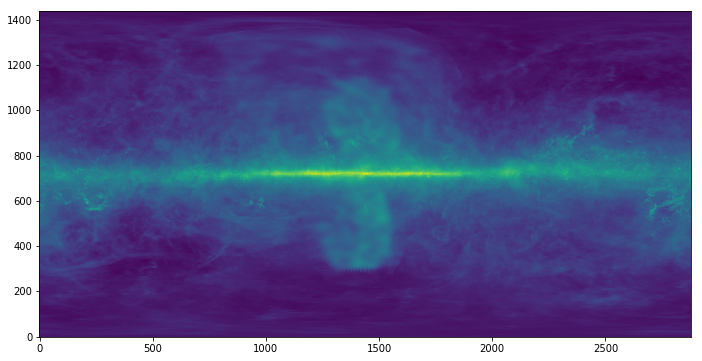

In [8]:
for i in numpy.arange(5) : 
    figure(i,figsize=[18,6])
    imshow(numpy.log10(plane[i*6+4,:,:]),origin='lower')

It's easy to see the large structures known as the Fermi bubbles pop out in the higher-energy planes. 

Each image is scaled so that the maximum is always the same brightness. This does not convey how the Galactic diffuse component becomes less and less prominent at higher energies. (To see this, take a look at the model using fv.)

Backgrounds
-----------------
** Residual background, unresolved background sources, contamination from Earth emission **
    
**Need:** Spectral form, maybe spatial template

In the sky frame, residual instrumental background and unresolved sources are both essentially isotropic. 

Given a small enough region of interest (ROI) and a tight enough zenith angle cut, the Earth limb contribution is also isotropic, and can be ignored. 

The isotropic model assumes a uniform spatial distribution, and uses a text file for the spectral form.

> ** NOTE: ** In earlier LAT data sets, the Earth limb was included as a diffuse template. Pass 8 has made this unnecessary, as long as a zenith cut of 90 degrees is used. Any remaining Earth Limb emission has little structure and is subsumed into the isotropic diffuse template. 


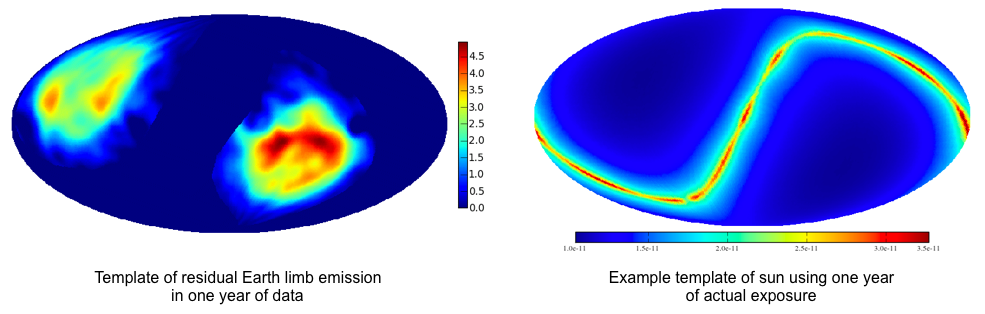

In [40]:
Image(filename='images/other_bkgs.png',width=1000)

Accessing the Diffuse and Background Models
---------------------------

Current isotropic and Galactic diffuse background models can be accessed from the following directory in the VM:

> /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/refdata/fermi/galdiffuse

To see models used for earlier analyses, go to the [FSSC Website](http://fermi.gsfc.nasa.gov/ssc/)&rarr;[Data](http://fermi.gsfc.nasa.gov/ssc/data/)&rarr;[Data Access](http://fermi.gsfc.nasa.gov/ssc/data/access/)&rarr;[LAT Background Models](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/BackgroundModels.html) page.

In [27]:
HTML("<iframe src='http://fermi.gsfc.nasa.gov/ssc/data/access/lat/BackgroundModels.html' width='850' height='500'></iframe>")

In [41]:
%system ls $FERMI_DIR/refdata/fermi/galdiffuse

['EGRET_diffuse_cel.fits',
 'EGRET_diffuse_gal.fits',
 'gll_iem_v06.fits',
 'GP_gamma.fits',
 'GP_gamma_v0r0p1.fits',
 'iso_clean_back_v05_rev1.txt',
 'iso_clean_front_v05_rev1.txt',
 'iso_clean_v05_rev1.txt',
 'iso_clean_v05.txt',
 'iso_p7v6clean.txt',
 'iso_p7v6source.txt',
 'iso_P8R2_CLEAN_V6_BACK_v06.txt',
 'iso_P8R2_CLEAN_V6_EDISP0_v06.txt',
 'iso_P8R2_CLEAN_V6_EDISP1_v06.txt',
 'iso_P8R2_CLEAN_V6_EDISP2_v06.txt',
 'iso_P8R2_CLEAN_V6_EDISP3_v06.txt',
 'iso_P8R2_CLEAN_V6_FRONT_v06.txt',
 'iso_P8R2_CLEAN_V6_PSF0_v06.txt',
 'iso_P8R2_CLEAN_V6_PSF1_v06.txt',
 'iso_P8R2_CLEAN_V6_PSF2_v06.txt',
 'iso_P8R2_CLEAN_V6_PSF3_v06.txt',
 'iso_P8R2_CLEAN_V6_v06.txt',
 'iso_P8R2_SOURCE_V6_BACK_v06.txt',
 'iso_P8R2_SOURCE_V6_EDISP0_v06.txt',
 'iso_P8R2_SOURCE_V6_EDISP1_v06.txt',
 'iso_P8R2_SOURCE_V6_EDISP2_v06.txt',
 'iso_P8R2_SOURCE_V6_EDISP3_v06.txt',
 'iso_P8R2_SOURCE_V6_FRONT_v06.txt',
 'iso_P8R2_SOURCE_V6_PSF0_v06.txt',
 'iso_P8R2_SOURCE_V6_PSF1_v06.txt',
 'iso_P8R2_SOURCE_V6_PSF2_v06.txt',
 

In [42]:
%system cat  $FERMI_DIR/refdata/fermi/galdiffuse/iso_P8R2_SOURCE_V6_v06.txt

['34.171 2.52894e-06 2.02085e-09',
 '44.3332 1.2486e-06 6.37177e-10',
 '57.5177 6.14648e-07 4.13763e-10',
 '74.6231 3.09835e-07 2.20674e-10',
 '96.8155 1.58407e-07 1.36949e-10',
 '125.608 9.04064e-08 8.11021e-11',
 '162.963 5.44142e-08 5.50435e-11',
 '211.427 2.96885e-08 3.16824e-11',
 '274.305 1.579e-08 2.14466e-11',
 '355.881 8.43735e-09 1.23411e-11',
 '461.718 4.44418e-09 8.65201e-12',
 '599.03 2.29861e-09 4.88778e-12',
 '777.179 1.15194e-09 3.40223e-12',
 '1008.31 5.86237e-10 1.8733e-12',
 '1308.17 3.20117e-10 1.35489e-12',
 '1697.21 1.693e-10 7.78405e-13',
 '2201.96 8.10908e-11 5.07993e-13',
 '2856.81 4.52716e-11 2.96714e-13',
 '3706.4 2.82454e-11 2.08615e-13',
 '4808.67 1.73345e-11 1.29451e-13',
 '6238.74 1.18072e-11 8.67036e-14',
 '8094.1 8.85445e-12 6.50473e-14',
 '10501.2 5.78221e-12 4.33332e-14',
 '13624.2 3.5016e-12 2.7109e-14',
 '17676 1.94812e-12 1.82675e-14',
 '22932.8 9.90092e-13 9.89296e-15',
 '29752.8 5.29403e-13 6.84413e-15',
 '38601.2 2.95822e-13 4.13595e-15',
 '5008

XML Structure
=====================

Now that we've looked at the components of your analysis, let's look at how the XML model is structured.

XML is a markup language (like HTML). It always uses the same basic format:

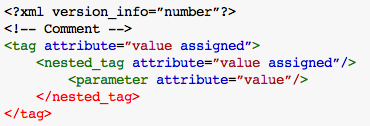

In [30]:
Image(filename='images/xml_generic.png')

**XML TAGS AND ATTRIBUTES**
* Start tags ( < ) must have end tags ( /> )
* Parameter tags usually start and end on the same line
* Values for attributes are in double quotes ( “  “ ) 
* NO SPACES within an attribute definition
* If you can avoid touching the XML model, that’s best! *It’s EASY to make a typo that ruins your week.*
    
Each source in your model will have its own entry describing the source, spectral information, and spatial information, as well as some optional attributes you can apply to the source.


Here is an entry for a single source in a LAT XML model:

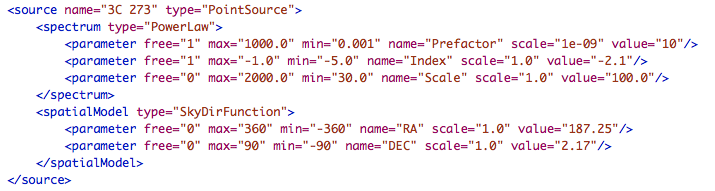

In [31]:
Image(filename='images/model1_xml.png')

Let's look at each field in more detail...



Source Attributes
-----------------

* **source**
    * **name** (user-defined) - Source names cannot be duplicated
    * **type** - Two available source types
        * **PointSource** - used for any source that can be described within a small region. It may seem counter-intuitive 
        * **DiffuseSource** - used for all-sky diffuse components; isotropic, Galactic, Earth limb, sun/moon templates and  extended sources.
        * The output values for the two source types have different units (the DiffuseSource has a factor in steradians. Remember to take that into consideration when looking at output values.  
        

* **spectrum**
    * Each spectral model uses a different functional fom. A list of the functional forms for the various spectral models is available at the [FSSC Website](http://fermi.gsfc.nasa.gov/ssc/)&rarr;[Data](http://fermi.gsfc.nasa.gov/ssc/data/)&rarr;[Data Analysis](http://fermi.gsfc.nasa.gov/ssc/data/analysis/)&rarr;[Analysis Threads](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/)&rarr;[Spectral and Spatial Model Descriptions](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/source_models.html)
    * Each spectral model also has a corresponding [Example XML model](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/xml_model_defs.html) available.
    * The parameters included for each model are determined by the variables in the functional form.
    * Two of the spectral models (**PowerLaw2** and **BrokenPowerLaw2**) produce an integral flux value as the default output.
    * The **FileFunction** model allows you to define a custom spectral form within a text file. The isotropic diffuse component is an example.
    

* **spatialModel**
    * **SkyDirFunction** - used for point sources. Takes RA and Dec as parameters.
    * **SpatialMap** - used for extended sources that use simple spectral forms, like the Earth limb template and most compact extended sources. Takes a FITS image with position information encoded into the FITS header.
    * **ConstantValue** - Used for all-sky isotropic components with no spatial structure.
    * **MapCubeFunction** - Used for spectrally complex extended sources, like the all-sky Galactic diffuse model.
    

* Other attributes
    * **map_based_integral** - Used in the spatialModel tag. Set to *true* for extended sources. Default is *false*.
    * **parameter** - Variables used in the likelihood fit. Parameters can have the following attributes:
        * value — the parameter's value; may be an initial guess or the result of a fit
        * scale — a scale factor for the parameter's value. Ususally a multiple of 10.
        * name — name given to the parameter
        * max — parameter's maximum value (assuming the scale factor)
        * min — parameter's minimum value (assuming the scale factor)
        * free — whether the parameter should be fit: 0 means the parameter value should be fixed (frozen), 1 that it should be fit (thawed)

Let's take a look at some of the spectral forms available for use in the XML model.

In [32]:
HTML("<iframe src='http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/source_models.html' width='850' height='500'></iframe>")

Extended Sources
----------------

Sources that cannot be modeled well as point sources. 

* Evident event as early as the 1FGL catalog when the LMC region was found to consist of five individual point sources. 

* Now 25 sources that are clearly extended in LAT catalog analysis. 

* Archive with templates and sample XML models has been made available by the LAT team. 
    * Download and extract the most recent of these from the [3FHL Catalog](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/3FHL/) page (Extended Sources Archive).
    * I put mine in the '/vagrant' directory in the VM


**The archive contains:**

* An overview FITS file (LAT_extended_sources_v18.fits)
    * Information about each source that had been detected as an extended source in the LAT catalog analysis at the time the 3FGL catalog was published. 
* Directories containing: 
    * XML model files
    * Spatial template FITS files

We can take a look at several of these template files in [ds9](http://ds9.si.edu/site/Home.html). 

\> cd Extended_archive_v18/Templates/

\> ds9 -tile IC443.fits -log -cmap b -zoom 1.7 W44.fits -log -cmap b -zoom 1.7 CygnusLoop.fits -log -cmap b -zoom 0.8 LMC-30DorWest.fits -log -cmap b -zoom 0.3 CenALobes.fits -log -cmap b -zoom 3 S147.fits -log -cmap b

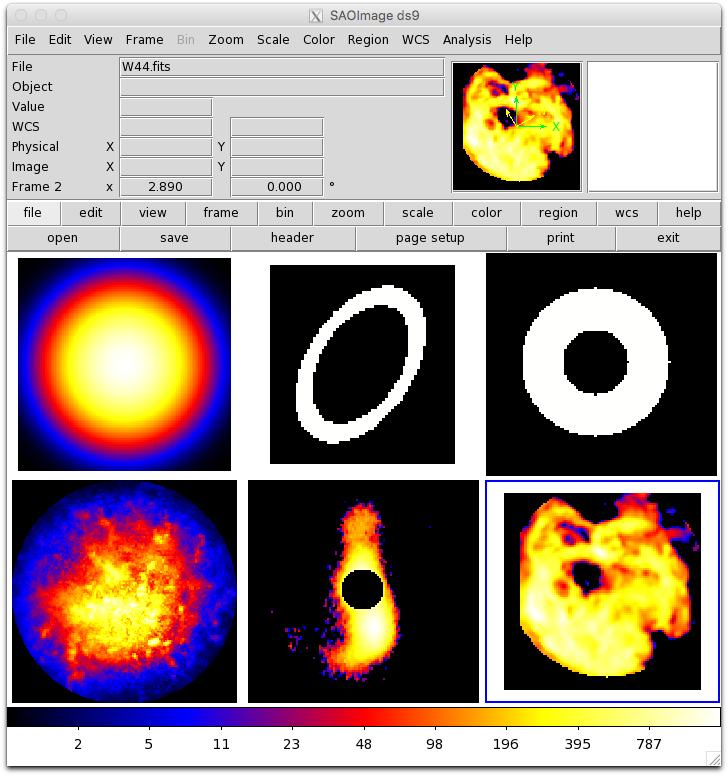

In [45]:
Image(filename='images/extended_templates.png')

Which template should I use?
----------

As with spectral models, we recommend using simple templates (disks, rings, 2D gaussians).

**However** some sources are better fit using templates from other wavebands. (Example: Centaurus A, Large Magellanic Cloud)

XML for an extended source
---------

To include an extended source in your XML model, the code looks like this:

In [ ]:
Image(filename='images/xml_extended.png')

You can use any spectral model with the template -  assuming the morphology of the emission does not change with energy. 

> **That's an assumption.** May not be true.

If you want the size/shape of the emission to change in different energy bands, you will need to define a map cube. (Example: Interstellar emission model)

All-Sky Diffuse Sources
---------------------

*[gtdiffrsp](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtdiffrsp.txt)* calculates the expected diffuse emission per unit livetime on an event-by-event basis prior to performing an unbinned likelihood fit. 

**This is computationally-intensive** 

For Pass 8 LAT data, Galactic and isotropic diffuse responses will need to be precalculated if you decide to use an Unbinned analysis. This is not necessary for Binned Likelihood. 

* *[gtlike](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtlike.txt)* checks the FITS header information to see what diffuse responses have been pre-calculated.

* If they are not present, *[gtlike](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtlike.txt)* will run the *[gtdiffrsp](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtdiffrsp.txt)* process **every time you run the tool**.

* To find out what's been precalculated, look at the header of your events file.

In [44]:
filtered_data = pyfits.open('data/3C279_mktime.fits')
[filtered_data[1].header['DIFRSP0'], filtered_data[1].header['DIFRSP1'], filtered_data[1].header['DIFRSP2'], filtered_data[1].header['DIFRSP3']]

['NONE', 'NONE', 'NONE', 'NONE']

This shows that no diffuse responses have been precalculated in this data file. 

To add diffuse responses, you must run *gtdiffrsp*. This requires an initial XML model file as an input to tell *gtdiffrsp* which isotropic and galactic diffuse models you plan to use for your analysis. 

Here we are using the following diffuse model:

* Galactic diffuse model = gll_iem_v06.fits
* Isotropic diffuse model = iso_P8R2_SOURCE_V6_v06.txt

The XML for the diffuse components should look like this:

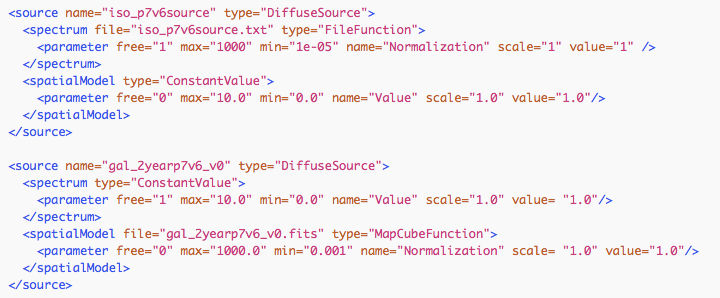

In [47]:
Image(filename='images/xml_diffuse.png')

And here is how you run *gtdiffrsp* in python:

In [49]:
import gt_apps
dir(gt_apps)

['GtApp',
 'TsMap',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 'addCubes',
 'counts_map',
 'diffResps',
 'evtbin',
 'expCube',
 'expMap',
 'filter',
 'gtexpcube2',
 'like',
 'maketime',
 'model_map',
 'obsSim',
 'rspgen',
 'srcMaps']

In [50]:
from gt_apps import diffResps
diffResps.pars()

' evfile= evtable="EVENTS" scfile= sctable="SC_DATA" srcmdl= irfs="CALDB" evclsmin=0 evclass="INDEF" evtype="INDEF" convert=no chatter=2 clobber=no debug=no gui=no mode="ql"'

In [54]:
diffResps['evfile'] = 'data/3C279_mktime.fits'
diffResps['scfile'] = 'data/SC00.fits'
diffResps['srcmdl'] = '3C279_input_model.xml'
diffResps['irfs'] = 'CALDB'
diffResps['evclass'] = 'INDEF'
diffResps['evtype'] = 'INDEF'

In [55]:
diffResps.run()

time -p /usr/local/fermisoft/v10r0p5-fssc-20150518A/x86_64-unknown-linux-gnu-libc2.17/bin/gtdiffrsp evfile=data/3C279_mktime.fits evtable="EVENTS" scfile=data/SC00.fits sctable="SC_DATA" srcmdl=3C279_input_model.xml irfs="CALDB" evclsmin=0 evclass="INDEF" evtype="INDEF" convert=no chatter=2 clobber=no debug=no gui=no mode="ql"


KeyboardInterrupt: 

In order to tell *[gtlike](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtlike.txt)* that the diffuse response has been precalculated, *gtdiffrsp* adds header keywords to the data file that tell what combination of IRFs + diffuse model were used in the calculation. Here we used:
* IRFs = P8R2_SOURCE_V6
* Galactic diffuse = gll_iem_v06
* Isotropic diffuse = iso_P8R2_SOURCE_V6_v06

Check the header to see what those keywords look like:

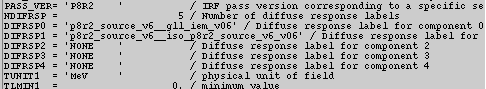

In [56]:
Image(filename='images/diffrsps.png')

This calculation took 2 hours on my computer 6 months of data. It is not needed for Binned Likelihood analyses, so you will probably not need to do it unless you're analyzing short datasets (e.g. blazar time series).

If you find that you DO need the diffuse response, there is a dataset at the FSSC where you can download weekly files with these columns precalculated. They are located on the FTP site at:
> ftp://legacy.gsfc.nasa.gov/fermi/data/lat/weekly/diffuse/

Potential Pitfalls
------------------

As with everything else associate with likelihood analysis, the values in your XML file are often interrelated. Here I've highlighted some of the parameters that may cause you grief if you're not used to looking at them, or if you've stared so long you can no longer see straight:


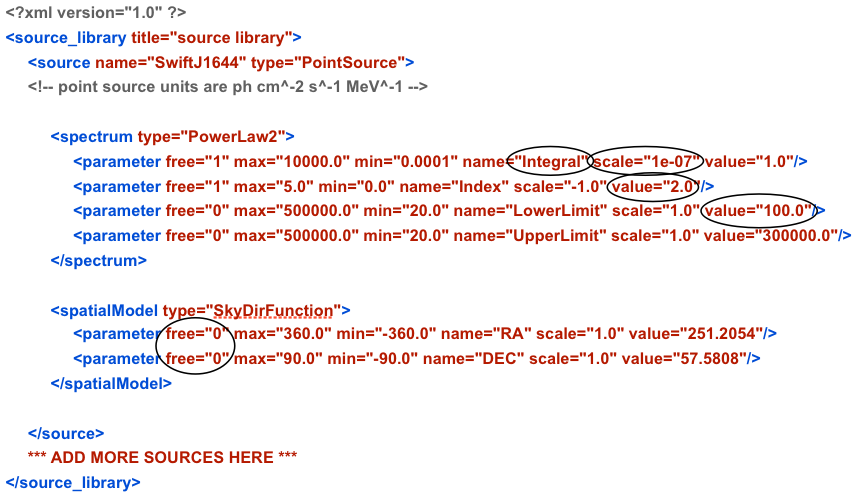

In [57]:
Image(filename='images/xml_pitfalls.png')

**NOTES FOR PARAMETER VALUES**

* If you try to set a value outside the min-max range, you will get an error
* If you don’t set scale so that value is a reasonable size, the optimizer may not converge (not true for fixed parameters)
* If you try to integrate over an energy range that has no data, your fit will fail
* If you try to fit a source that lies outside your ROI, your fit will fail 
* You should not try to fit position during a likelihood fit. There are other, more appropriate tools for that task.

Constructing an XML model
=========================

There are several methods of generating an XML model. You can:

* Build one from scratch (3033 sources in 4 years!)
* Use the *modeleditor* tool in the Fermi Science Tools
* Use a script and some basic assumptions
* Ask a friend for theirs and tweak it!

ModelEditor
------------

The ModelEditor is a GUI that allows you to add various sources, one at a time, to an XML model. You can freeze and thaw various parameters, change spectral models, etc...

You can start the ModelEditor in the terminal window by typing:

\> modeleditor

In [ ]:
%system modeleditor

The ModelEditor window provides drop-down menus for the available spectral and spatial models, with the appropriate parameter sets preloaded for you. It also provides different templates for point sources (also used for small extended sources) and large-scale or all-sky diffuse sources. 

Here I have entered reasonable values for our source of interest, 3C 279. Note that the position paratemers and the Scale parameter are not left free.

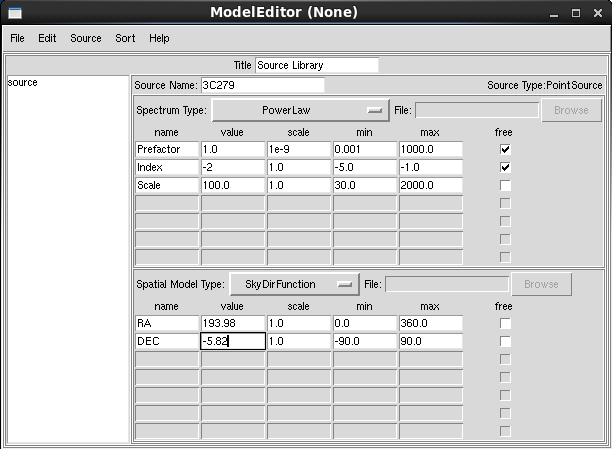

In [59]:
Image(filename='images/modeleditor_1.png')

The *Source* menu allows you to easily add and remove sources. You can also import sources within your ROI from the LAT catalogs, with the option to filter out low-significance sources.

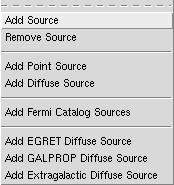

In [60]:
Image(filename='images/modeleditor_source_menu.png')

There are numerous ways to generate initial seed positions for sources in your model. The simplest way is to use [ds9](http://ds9.si.edu/site/Download.html) to look at the image and find potential excesses. 

You can play with the scaling and smoothing to find sources. Mousing over them gives you a rough idea of where the source is located. 

In [61]:
%system ds9 data/3C279_cmap.fits

['application-specific initialization failed: couldn\'t connect to display "localhost:10.0"',
 'Unable to initialize window system.']

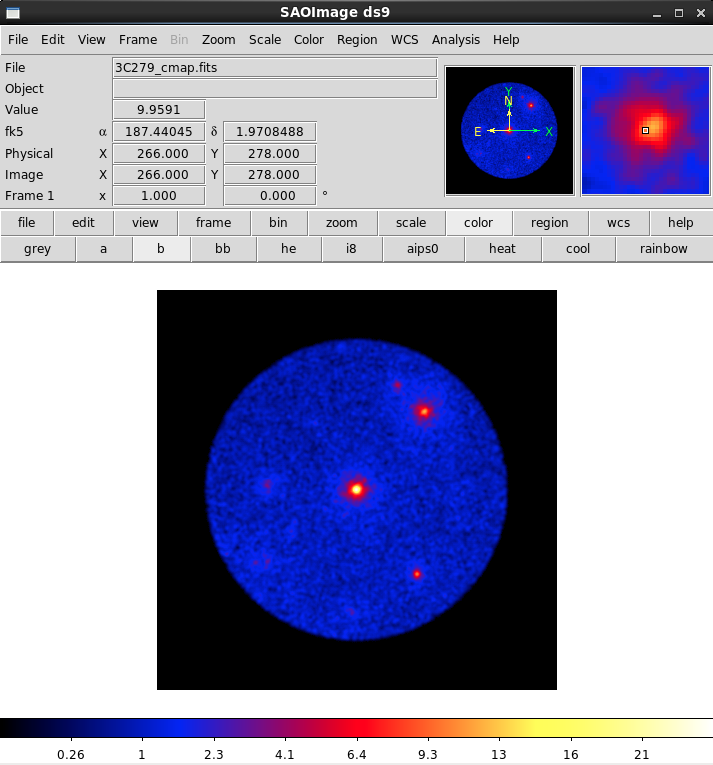

In [62]:
Image(filename='images/ds9_3c279_cmap.png')

Excesses:
* 3C_279: 193.98, -5.82
* 3C_273: 187.24, 2.07
* Source_1: 187.8, -14.19
* Source_2: 189.9, 4.66
* Source_3: 203.1, -5.3

Of course, there are many better ways to do this. But this works as a first cut. After completing an initial likelihood fit, you can to refine these positions with the *[gtfindsrc](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtfindsrc.txt)* tool, iterate, and then refit with the better positions.

We can enter these into the ModelEditor, and then add the Galactic and isotropic diffuse models. Remember that the names of the two diffuse components should match the information in the diffuse response columns.

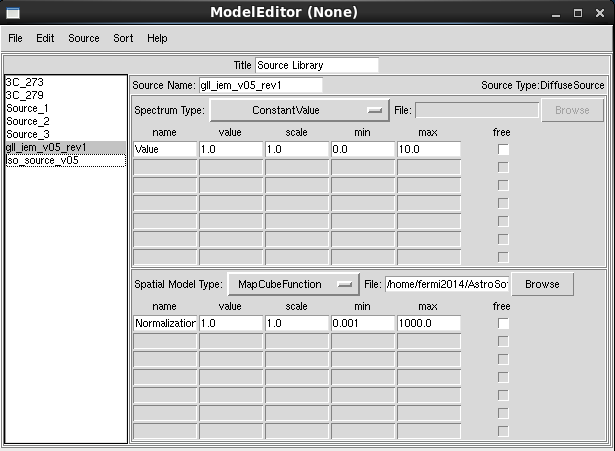

In [63]:
Image(filename='images/modeleditor_2.png')

The sort menu provides options if you wish to sort, which is especially useful if your model has many sources.

Once you are done, save the file as *filename.xml* in the directory where you are analyzing your data.

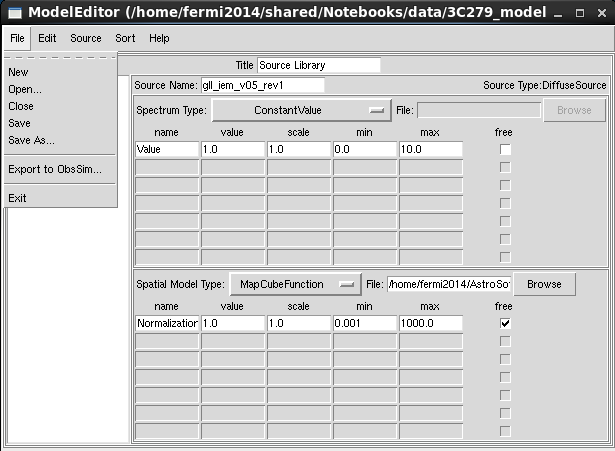

In [64]:
Image(filename='images/modeleditor_3.png')

In [67]:
%system cat data/3C279_model_me.xml

['<?xml version="1.0" ?>',
 '<source_library title="Source Library" xmlns="http://fermi.gsfc.nasa.gov/source_library">',
 '  <source name="3C279" type="PointSource">',
 '    <spectrum type="PowerLaw">',
 '      <parameter free="true" max="1000.0" min="0.001" name="Prefactor" scale="1e-09" value="1.0"/>',
 '      <parameter free="true" max="-1.0" min="-5.0" name="Index" scale="1.0" value="-2.1"/>',
 '      <parameter free="false" max="2000.0" min="30.0" name="Scale" scale="1.0" value="100.0"/>',
 '    </spectrum>',
 '    <spatialModel type="SkyDirFunction">',
 '      <parameter free="false" max="360.0" min="0.0" name="RA" scale="1.0" value="193.98"/>',
 '      <parameter free="false" max="90.0" min="-90.0" name="DEC" scale="1.0" value="-5.82"/>',
 '    </spatialModel>',
 '  </source>',
 '  <source name="3C273" type="PointSource">',
 '    <spectrum type="PowerLaw">',
 '      <parameter free="true" max="1000.0" min="0.001" name="Prefactor" scale="1e-09" value="1.0"/>',
 '      <parameter 

**Questions to ask yourself when building your model**

1) What is the proper spectral model to use?

It's wisest to use the simplest model that well-represents the data. Don't use a Broken Power-Law (BPL), when a simple Power Law (PL) will work. Likewise, don't use a Power-Law with Exponential Cutoff (PLEC) when a Log-Parabloa (LP) fits the data just as well. Adding degrees of freedom to your model will reduce your detection significance.

2) Which parameters should be left free?

A good rule of thumb is to leave free all parameters that affect spectral shape for sources near the source of interest. (And for that one too, of course!) How "near" is "near"? That's your call...but 5 degrees is not unreasonable.

3) How much freedom should the diffuse sources have?

In most cases, you will leave only the normalization parameter free for the all-sky diffuse components. Fitting the spectral shape of these components required a dedicated all-sky analysis. However, in some cases you may find you want to freeze the normalization for one or both diffuse components.

Another option - Python Script
-------------

One of the user-contributed tools available on the FSSC website is *[make3FGLxml.py](http://fermi.gsfc.nasa.gov/ssc/data/analysis/user/readme_make3FGLxml.txt)*, a python script that uses the 3FGL catalog file to generate an initial XML file that can be tweaked to your purpose. 

**Remember** 

* 3FGL catalog used only 4 years of LAT data
* Covered the energy range from 100 MeV to 300 GeV
* Analyses outside those time and energy ranges ***will require*** modifications to the model.

Download the script from the [User Contributed Tools](http://fermi.gsfc.nasa.gov/ssc/data/analysis/user/) page, put it in the following directory, and make it executable:
> \> mv make3FGLxml.py \$FERMI_DIR/bin/.

> \> chmod +r \$FERMI_DIR/bin/make3FGLxml.py

You will need access to the most recent all-sky catalog (3FGL) in FITS format. You can download it from the [LAT 4-year Point Source Catalog](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/4yr_catalog/) page (gll_psc_v16.fit).

The inputs for the script are as follows:

* Catalog file - The gll_psc_v16.fits file you just downloaded. 
* LAT events file - The script uses the position information from the header to determine which sources should be included in your model.
* Galactic diffuse model - You need the full path: 
    * /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/refdata/fermi/galdiffuse/gll_iem_v06.fits
* Appropriate isotropic diffuse model - Again, you will need the full path: 
    * /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/refdata/fermi/galdiffuse/iso_P8R2_SOURCE_V6_v06.txt

There are also optional parameters:

* radLim - number of degrees from the center of the ROI beyond which all parameters are fixed. By default this equals the ROI from your data file.
* signif - Lower value for the source significance under which less significant sources will be frozen to their catalog parameter values. Excellent when making models for light curves that will use short-duration data sets.
* extDir - full path to the directory containing the extended source template files (also on your USB drive) 
* psForce - Set to 'True' to force all extended sources in the catalog to be modeled instead as point sources. Useful if source extension is not significant (for short duration data sets) or to help speed up the likelihood fit. (The latter is not advised for publication-quality results.)


In [1]:
%system make3FGLxml.py -h

['This is make3FGLxml version 01r0.',
 'The default diffuse model files and names are for pass 8 and assume you have v10r00p05 of the Fermi Science Tools or higher.',
 'usage: make3FGLxml.py [-h] [-o OUTPUTXML] [-G GALFILE] [-g GALNAME]',
 '                      [-I ISOFILE] [-i ISONAME]',
 '                      [-N [{True,False,T,F,t,f,TRUE,FALSE,true,false,1,0}]]',
 '                      [-e EXTDIR] [-r RADLIM] [-R MAXRAD] [-ER EXTRARAD]',
 '                      [-s SIGFREE]',
 '                      [-v {True,False,T,F,t,f,TRUE,FALSE,true,false,1,0}]',
 '                      [-p [{True,False,T,F,t,f,TRUE,FALSE,true,false,1,0}]]',
 '                      [-m {True,False,T,F,t,f,TRUE,FALSE,true,false,1,0}]',
 '                      [-GIF [{True,False,T,F,t,f,TRUE,FALSE,true,false,1,0}]]',
 '                      [-ED [{True,False,T,F,t,f,TRUE,FALSE,true,false,1,0}]]',
 '                      [-wd WRITEDIR]',
 '                      [-ON [{True,False,T,F,t,f,TRUE,FALSE,true,false,1

Now we're ready to build the source model...

In [4]:
%system make3FGLxml.py gll_psc_v16.fit data/3C279_mktime.fits \
        --outputxml 3C279_model_py.xml \
        --galfile gll_iem_v06.fits \
        --galname gll_iem_v06 \
        --isofile iso_P8R2_SOURCE_V6_v06.txt \
        --isoname iso_P8R2_SOURCE_V6_v06 \
        --extDir Extended_archive_v15/Templates \
        --radLim 10 --sigFree 7 -m False

['This is make3FGLxml version 01r0.',
 'The default diffuse model files and names are for pass 8 and assume you have v10r00p05 of the Fermi Science Tools or higher.',
 'Warning: 3C279_model_py.xml already exists, file will be overwritten if you proceed with makeModel.',
 'Creating file and adding sources from 3FGL',
 'Traceback (most recent call last):',
 '  File "/usr/local/fermisoft/v10r0p5-fssc-20150518A/x86_64-unknown-linux-gnu-libc2.17/bin/make3FGLxml.py", line 725, in <module>',
 "    if __name__=='__main__': cli()",
 '  File "/usr/local/fermisoft/v10r0p5-fssc-20150518A/x86_64-unknown-linux-gnu-libc2.17/bin/make3FGLxml.py", line 722, in cli',
 '    sL.makeModel(args.galfile,args.galname,args.isofile,args.isoname,args.normsonly,args.extDir,args.radLim,args.maxRad,args.ExtraRad,args.sigFree,args.varFree,args.psForce,args.makeRegion,args.GIndexFree,args.edisp,args.writeDir,args.oldNames)',
 '  File "/usr/local/fermisoft/v10r0p5-fssc-20150518A/x86_64-unknown-linux-gnu-libc2.17/bin/ma

In [6]:
%system head -n 50 data/3C279_model_py.xml

['<?xml version="1.0" ?>',
 '<source_library title="source library">',
 '',
 '<!-- Point Sources -->',
 '',
 '<!-- Sources between [0.0,5.0) degrees of ROI center -->',
 '<source ROI_Center_Distance="4.632" name="3FGL J1243.9-0217" type="PointSource">',
 '\t<spectrum apply_edisp="false" type="PowerLaw">',
 '\t<!-- Source is 4.63151941063 degrees away from ROI center -->',
 '\t<!-- Source signficance 5.1 is less than specified minimum for a free source of 7.0 -->',
 '\t\t<parameter free="0" max="1e4" min="1e-4" name="Prefactor" scale="1e-13" value="1.03579444284"/>',
 '\t\t<parameter free="0" max="10.0" min="0.0" name="Index" scale="-1.0" value="2.18595"/>',
 '\t\t<parameter free="0" max="5e5" min="30" name="Scale" scale="1.0" value="1849.088135"/>',
 '\t</spectrum>',
 '\t<spatialModel type="SkyDirFunction">',
 '\t\t<parameter free="0" max="360.0" min="-360.0" name="RA" scale="1.0" value="190.977"/>',
 '\t\t<parameter free="0" max="90" min="-90" name="DEC" scale="1.0" value="-2.2843"/>'

There are some important things to notice here:
----------

* The script added 137 sources, compared to the 4 sources we used previously in this analysis and the 7 sources we could identify by eye in the counts map.
    * Fixing parameters for faint sources provides a performance boost, especially when using less time than was used in the catalog analysis.
* There are no extended sources
    * If there had been an extended source and we wanted to perform an **unbinned** analysis, we would need to run *[gtdiffrsp](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtdiffrsp.txt)* **AGAIN** to create the diffuse response column for that extended source. 
    * Remember, **binned likelihood** does not use the event-by-event diffuse response.
* The script has added the sources in 4-degree concentric rings of increasing distance from the center of the ROI. 
* The script has provided the radial separation for each source from the center of the ROI. Only sources inside 7 degrees have their parameters left free.
* The source names provided by the script are the 3FGL catalog names.
* The initial values used in the model are the fitted values from the 3FGL catalog.
* The Galactic and isotropic diffuse models are included at the end of the file
    * The source names are the designators we provided when we called the script
* There is no mechanism in the script for adding a Sun/Moon template file
    * It must be added manually if desired.

Handling Energy Dispersion
---------

For Pass 8 analyses of energies below ~200 MeV, energy dispersion is significant.

* Enable the use of the energy dispersion correction
    * Only possible when performing a Binned Likelihood analysis 
    * Only possible when using python
    
PyLikelihood commands for manipulating the energy dispersion correction:

* Turn on energy dispersion handling - like.logLike.set_edisp_flag(True)
* Check if edisp handling is turned on - print like.logLike.use_edisp()
* Turn off energy dispersion handling - like.logLike.set_edisp_flag(False)


Once enabled, energy dispersion correction is enabled for **all** the components in the XML model. 

Should not be enabled for components that have already been corrected for energy dispersion, or components that were derived from a fit to the data without energy dispersion correction. This includes:

* Galactic diffuse model
* Isotropic templates
* Earth limb template

To turn off energy dispersion for a specific source, include *apply_edisp="false"* in the < spectrum > attribute for that source in your XML model.

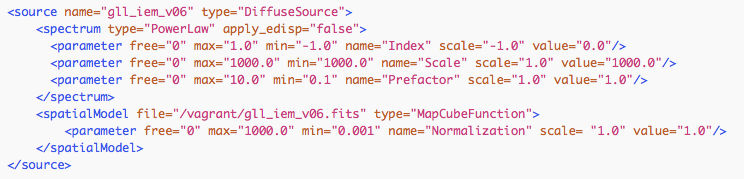

In [9]:
Image(filename='images/edisp_off_xml.png')

Other uses for your XML model
====================

XML models are used as inputs for more than just the likelihood analysis. They can also be used to test for unmodeled sources, to create a test statistic map of the fitted sources, to perform a source localization, to assign probabilities to detected events, and to generate simulated data sets.

Testing for unmodeled sources
----------------

Once a likelihood fit has completed, you may wish to test for other sources in your ROI that were not included in your model. To do this, you should freeze all parameters in your model **except for the normalization/prefactor for the diffuse components** and then run the *[gttsmap](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gttsmap.txt)* tool. This tests for excesses in the data above what has been modeled. You leave the diffuse normalizations free because in the initial fit, the flux from an unmodeled point source often gets fitted into the diffuse component.

*[gttsmap](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gttsmap.txt)* creates a grid of pixels and then performs one likelihood fit per pixel, making the assumption that there is an unmodeled point source (power-law spectrum) at the position of each pixel. The result is an image showing the positions where pointlike excesses are present. By examining the output, you can determine if any significant, and then add them to your model for a refit of the data.

Making Test Statistic Maps
----------------

It is often useful to look at how your source of interest looks in test statistic space. This can reveal evidence for non-pointlike morphologies, or issues with nearby structure in the Galactic diffuse model. 

To do this, you first remove the source of interest from the model completely. Then freeze all parameters of the remaining sources, including the diffuse components. Then run the *[gttsmap](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gttsmap.txt)* tool to create a map showing the profile of the source you omitted from the model in test statistic (significance) space.

***Warning!!*** Running *gttsmap* is very time intensive, as it performs a likelihood fit at each pixel. In the following images, I generated TS maps for six months of data in a 20x20 degree region with 0.25 degree pixels. The source model contained only four sources (3C279, 3C273 and 2 diffuse sources). The run time to perform the 6400 likelihood fits for each map was about four days. 

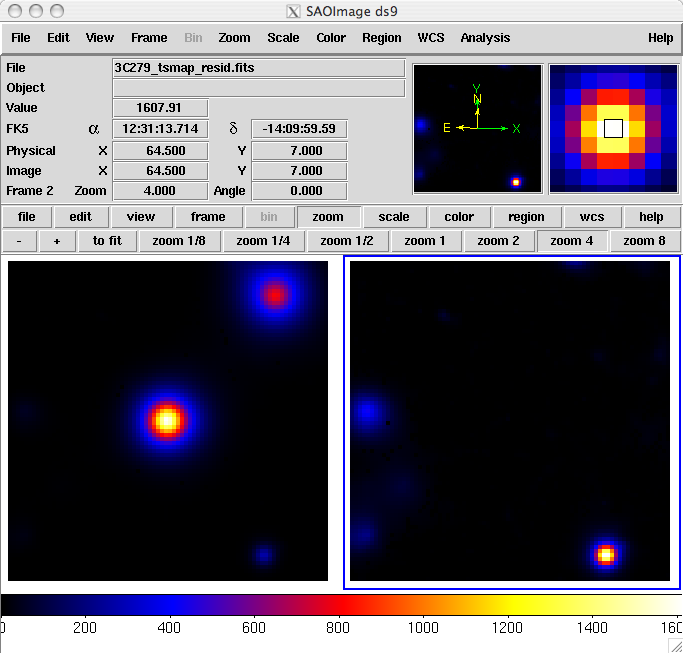

In [10]:
Image(filename='images/3C279_tsmap_tiled.png')

Perform a source localization
----------------

Recall that it is not recommended to perform a position fit while also fitting all the other parameters in a likelihood analysis. Instead, the *[gtfindsrc](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtfindsrc.txt)* tool is used to determine the position of a gamma-ray excess. A model (including the source of interest) that has been properly maximized and has converged is used as the input to the source finding algorithm. 

The process is very similar to what is done by *gttsmap* above, but with an additional analytic component. Essentially, the tool analyzes the likelihood surface ad determines the position at which the source has the highest test statistic. It then uses the shape of that likelihood surface to determine the 68% confidence radius. Both position and error radius are reported by the tool once the analysis is complete. As with *gttsmap*, this is a time and processor-intensive analysis.

Assigning Probabilities to Events
------------------------

The maximum likelihood process essentially is a sorting process. The software compares the model provided to the measured properties of each event, and decides which source that event is most likely to have generated that event. 

In fact, the process is even more subtle than that. It divides each event into the various sources according to the fractional probability that the source was the source of the event. As a result, a single event can contribute to the Npred for multiple sources...as long as the total is one full event.

The *[gtsrcprob](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtsrcprob.txt)* tool gives you access to the probability matrix that likelihood uses to to determine how to divide up the contribution of each event. This can then be used to refine and/or weight your data set to favor events that are more likely to have originated from your source of interest.

Generating Simulated Data Sets
----------------

The *[gtobssim](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtobssim.txt)* tool uses observatory pointing information plus a source model and the instrument responses to generate simulated instrument data that can be used for any number of purposes. However, the format used by this tool is different than that used by the likelihood analysis tools. 

The easiest way to convery an XML model file in likelihood format to that accepted by *gtobssim*, is to open the file in the *ModelEditor* tool and then export the model to the ObsSim format from there.

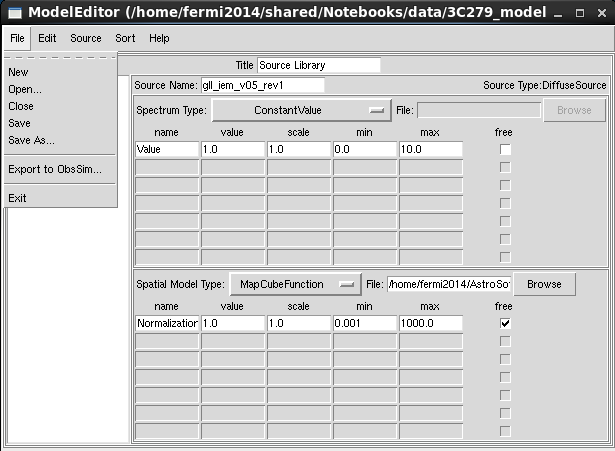

In [11]:
Image(filename='images/modeleditor_3.png')

Energy dispersion in simulations
-----------

*[gtobssim](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtobssim.txt)* enables the simulation of energy dispersion by default. 

In order to turn off that simulation for a specific source, add the *apply_edisp="false"* option to the < spectrum > attribute for that source in your *[gtobssim](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtobssim.txt)* XML model.

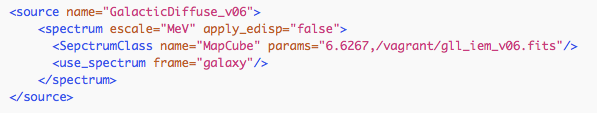

In [12]:
Image(filename='images/edisp_off_obssim_xml.png')